<a href="https://colab.research.google.com/github/hawa1983/DATA-602-Assignment-6/blob/main/07_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7**
# **Fomba Kassoh & Souleyman Doumbia**

# **Weeks 8 & 9 - Pandas**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.

* You must use Pandas as the **primary tool** to process your data.

* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  
 * https://www.youtube.com/watch?v=inN8seMm7UI (Getting started with Colab).

* Your data should need some "work", or be considered "dirty".  You must show your skills in data cleaning/wrangling.

### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

For the purpose of this analysis, we are utilizing a dataset that encapsulates the payroll information of employees of the City of New York. This dataset provides a comprehensive view of the compensation structure within the city, including base salary, overtime hours, total overtime paid, and additional remunerations under the category of 'Total Other Pay'. The dataset covers various job titles, from management to specialist roles, and includes additional details such as start dates, work location boroughs, and leave status.

The source of this data is the NYC Open Data portal, https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e/about_data, which provides public access to citywide payroll information as part of New York City's commitment to transparency and accountability in public service.

This dataset was selected to provide insight into the payroll structure of New City government. By examining this dataset, we aim to understand how resources are allocated among city employees, who play a crucial role in running the city. The analysis may shed light on patterns of workforce deployment, financial compensation, and the work-life balance of employees as reflected by overtime hours.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



####**Import the dataset and create dataframes, final_data**

In [1]:
import pandas as pd
import requests
import io

base_url = "https://data.cityofnewyork.us/resource/k397-673e.csv"
offset = 0
data = []
record_count = 0

while True:
    # Construct the URL with the current offset
    url = f"{base_url}?$offset={offset}"

    # Make the API request
    response = requests.get(url)

    # Check if the response is successful
    if response.status_code == 200:
        # Convert the CSV response to a DataFrame
        chunk = pd.read_csv(io.StringIO(response.text))

        # Add the data to your list
        data.append(chunk)

        # Update the record count
        record_count += len(chunk)

        # Check if we've reached 100,000 records
        if record_count >= 100000:
            break

        # If less than 1000 rows are returned, also break the loop
        if len(chunk) < 1000:
            break

        # Increment the offset for the next request
        offset += 1000
    else:
        print(f"Failed to fetch data: {response.status_code}")
        break

# Concatenate the list of DataFrames into a single DataFrame
final_data = pd.concat(data, ignore_index=True)
print(final_data.head())



   fiscal_year  payroll_number                agency_name    last_name  \
0         2023            67.0  ADMIN FOR CHILDREN'S SVCS         DIAZ   
1         2023            67.0  ADMIN FOR CHILDREN'S SVCS     FIGUEROA   
2         2023            67.0  ADMIN FOR CHILDREN'S SVCS  D'ACUNTO JR   
3         2023            67.0  ADMIN FOR CHILDREN'S SVCS         DIAZ   
4         2023            67.0  ADMIN FOR CHILDREN'S SVCS        ELLIS   

  first_name mid_init        agency_start_date work_location_borough  \
0      YANNA        N  2016-05-16T00:00:00.000                 BRONX   
1       JUAN        E  2018-10-15T00:00:00.000             MANHATTAN   
2       PAUL        C  2016-05-02T00:00:00.000             MANHATTAN   
3        ANA        R  2007-06-04T00:00:00.000                QUEENS   
4   SAMANTHA        N  2021-05-24T00:00:00.000              BROOKLYN   

             title_description leave_status_as_of_june_30  base_salary  \
0  CHILD PROTECTIVE SPECIALIST                  

####**Summary statistics means, medians, quartiles**

In [2]:

# Selecting the columns of interest and grouping by 'fiscal_year'
selected_columns = ['base_salary', 'regular_hours', 'regular_gross_paid', 'ot_hours', 'total_ot_paid', 'total_other_pay']
summary = final_data.groupby('title_description')[selected_columns].describe()

print(summary)


                                            base_salary                 \
                                                  count           mean   
title_description                                                        
*ATTORNEY AT LAW                                   66.0   87280.363636   
*CERTIFIED APPLICATIONS DEVELOPER                   3.0   96373.000000   
*CERTIFIED DATABASE ADMINISTRATOR                  12.0  108460.750000   
*CERTIFIED LOCAL AREA NETWORK ADMINISTRATOR        11.0   97654.545455   
*COOK                                              58.0   40083.775862   
...                                                 ...            ...   
TELECOMMUNICATIONS ASSOCIATE                      100.0   73456.760000   
TEMPORARY CLERK                                  3790.0     536.043193   
TRAINER ASSISTANT                                 600.0   43486.794133   
VOTING MACHINE TECHNICIAN                        1102.0   40371.543457   
YOUTH DEVELOPMENT SPECIALIST          

####**Missing value information**

In [3]:
# Detect missing values:
''' There are missing values in payroll_number, last_name, mid_init, and work_location_borough '''
print(final_data.isnull().sum())

fiscal_year                       0
payroll_number                27556
agency_name                       0
last_name                         0
first_name                        0
mid_init                      36338
agency_start_date                 0
work_location_borough          8266
title_description                 0
leave_status_as_of_june_30        0
base_salary                       0
pay_basis                         0
regular_hours                     0
regular_gross_paid                0
ot_hours                          0
total_ot_paid                     0
total_other_pay                   0
dtype: int64


In [4]:
# Columns to check for outliers
selected_columns = ['base_salary', 'regular_hours', 'regular_gross_paid', 'ot_hours', 'total_ot_paid', 'total_other_pay']

# DataFrame to store outlier information
outliers_summary_df = pd.DataFrame()

for column in selected_columns:
    grouped = final_data.groupby('title_description')[column]
    Q1 = grouped.transform(lambda x: x.quantile(0.25))
    Q3 = grouped.transform(lambda x: x.quantile(0.75))
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = final_data.loc[(final_data[column] < lower_bound) | (final_data[column] > upper_bound), selected_columns + ['payroll_number']].copy()
    outliers.loc[:, 'Outlier Column'] = column
    outliers_summary_df = pd.concat([outliers_summary_df, outliers], ignore_index=True)

outliers_summary_df.drop_duplicates(inplace=True)
print(outliers_summary_df)


       base_salary  regular_hours  regular_gross_paid  ot_hours  \
0           398.02        1820.00           120452.43    104.50   
1         46540.00        1950.00            45365.19   1076.75   
2         95116.00           0.00            -4887.82      0.00   
3        163984.00        1820.00           164178.45      0.00   
4        132000.00        1820.00           131638.27      0.00   
...            ...            ...                 ...       ...   
48218        13.65        1755.50            23796.71    401.00   
48219        13.00        1544.00            19171.05     45.25   
48220    125000.00        1825.00           102247.79      0.00   
48221    165067.00        1825.00           163082.30      0.00   
48222        13.00        1366.67            15383.44     64.17   

       total_ot_paid  total_other_pay  payroll_number   Outlier Column  
0           13831.72             5.06            67.0      base_salary  
1           35950.12          5358.71            

# Data Wrangling
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables.

8. Filter your data based on some condition.

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group.
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups.

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

####**1. Modify multiple column names.**

In [5]:
''' 1. Modify multiple column names.'''
# Rename agency_name, agency_start_date, title_description to agency, start_date, title respectively.
import pandas as pd

# Renaming columns
renaming_mapping = {
    'agency_name': 'agency',
    'agency_start_date': 'start_date',
    'title_description': 'title'
}

# Rename the columns
final_data_renamed_col = final_data.rename(columns=renaming_mapping)

column_titles = final_data_renamed_col.columns.tolist()
print(column_titles)

# Print out the renamed columns
for old_name, new_name in renaming_mapping.items():
    print(f"Renamed column '{old_name}' to '{new_name}'")

['fiscal_year', 'payroll_number', 'agency', 'last_name', 'first_name', 'mid_init', 'start_date', 'work_location_borough', 'title', 'leave_status_as_of_june_30', 'base_salary', 'pay_basis', 'regular_hours', 'regular_gross_paid', 'ot_hours', 'total_ot_paid', 'total_other_pay']
Renamed column 'agency_name' to 'agency'
Renamed column 'agency_start_date' to 'start_date'
Renamed column 'title_description' to 'title'


**2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.**


In [6]:

# Displaying the data types of each column
print(final_data.dtypes)

fiscal_year                     int64
payroll_number                float64
agency_name                    object
last_name                      object
first_name                     object
mid_init                       object
agency_start_date              object
work_location_borough          object
title_description              object
leave_status_as_of_june_30     object
base_salary                   float64
pay_basis                      object
regular_hours                 float64
regular_gross_paid            float64
ot_hours                      float64
total_ot_paid                 float64
total_other_pay               float64
dtype: object


In [7]:
'''From above, some variables are displayed as the generic 'object' data type. Below, I will change and display them as the specific data type'''
# Convert various columns to string
final_data['agency_name'] = final_data['agency_name'].astype('string')
final_data['last_name'] = final_data['last_name'].astype('string')
final_data['first_name'] = final_data['first_name'].astype('string')
final_data['mid_init'] = final_data['mid_init'].astype('string')
final_data['work_location_borough'] = final_data['work_location_borough'].astype('string')
final_data['title_description'] = final_data['title_description'].astype('string')
final_data['leave_status_as_of_june_30'] = final_data_renamed_col['leave_status_as_of_june_30'].astype('string')
final_data['pay_basis'] = final_data['pay_basis'].astype('string')

# Convert 'start_date' to datetime
final_data['agency_start_date'] = pd.to_datetime(final_data['agency_start_date'])

# Displaying the data types of each column after changes
print(final_data.dtypes)

fiscal_year                            int64
payroll_number                       float64
agency_name                           string
last_name                             string
first_name                            string
mid_init                              string
agency_start_date             datetime64[ns]
work_location_borough                 string
title_description                     string
leave_status_as_of_june_30            string
base_salary                          float64
pay_basis                             string
regular_hours                        float64
regular_gross_paid                   float64
ot_hours                             float64
total_ot_paid                        float64
total_other_pay                      float64
dtype: object


**Fix missing and invalid values in data**

In [8]:
final_data['first_name'] = final_data['first_name'].replace('NaN', '')
final_data['mid_init'] = final_data['mid_init'].replace('NaN', '')
final_data['last_name'] = final_data['last_name'].replace('NaN', '')
print(final_data.head())

   fiscal_year  payroll_number                agency_name    last_name  \
0         2023            67.0  ADMIN FOR CHILDREN'S SVCS         DIAZ   
1         2023            67.0  ADMIN FOR CHILDREN'S SVCS     FIGUEROA   
2         2023            67.0  ADMIN FOR CHILDREN'S SVCS  D'ACUNTO JR   
3         2023            67.0  ADMIN FOR CHILDREN'S SVCS         DIAZ   
4         2023            67.0  ADMIN FOR CHILDREN'S SVCS        ELLIS   

  first_name mid_init agency_start_date work_location_borough  \
0      YANNA        N        2016-05-16                 BRONX   
1       JUAN        E        2018-10-15             MANHATTAN   
2       PAUL        C        2016-05-02             MANHATTAN   
3        ANA        R        2007-06-04                QUEENS   
4   SAMANTHA        N        2021-05-24              BROOKLYN   

             title_description leave_status_as_of_june_30  base_salary  \
0  CHILD PROTECTIVE SPECIALIST                     ACTIVE     65921.00   
1        COMMUNI

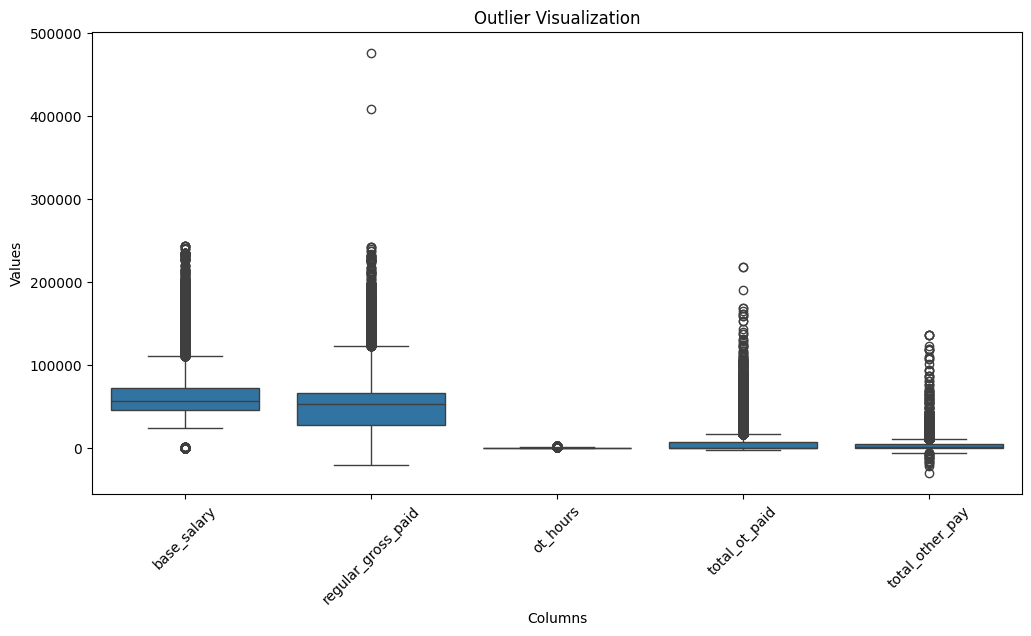

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting
plt.figure(figsize=(12, 6))
# Using melt to transform the DataFrame so it's easier to use with seaborn's boxplot
melted_data = pd.melt(final_data, value_vars=['base_salary', 'regular_gross_paid', 'ot_hours', 'total_ot_paid', 'total_other_pay'])
sns.boxplot(x='variable', y='value', data=melted_data)
plt.xticks(rotation=45)
plt.title('Outlier Visualization')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.show()


####**4. Create new columns based on existing columns or calculations.**

In [10]:
import numpy as np

# Calculate ot_pay_rate safely, avoiding division by zero
final_data['ot_pay_rate'] = np.where(final_data['ot_hours'] > 0, final_data['total_ot_paid'] / final_data['ot_hours'], np.nan)

# Add the new column by summing the specific columns
final_data['total_pay'] = final_data['regular_gross_paid'] + final_data['total_ot_paid'] + final_data['total_other_pay']

# Now 'df' includes the new column 'total_pay' with the summed values.

print(final_data)

       fiscal_year  payroll_number                     agency_name  \
0             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
1             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
2             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
3             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
4             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
...            ...             ...                             ...   
99995         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99996         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99997         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99998         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99999         2023           300.0  BOARD OF ELECTION POLL WORKERS   

         last_name first_name mid_init agency_start_date  \
0             DIAZ      YANNA        N        2016-05-16   
1         FIGUEROA       JUAN        E 

####**5. Drop column(s) from your dataset.**

In [11]:
# Drop the column 'work_location_borough'

# Drop 'ot_hours' column
final_data = final_data.drop('work_location_borough', axis=1)

print(final_data)

       fiscal_year  payroll_number                     agency_name  \
0             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
1             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
2             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
3             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
4             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
...            ...             ...                             ...   
99995         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99996         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99997         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99998         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99999         2023           300.0  BOARD OF ELECTION POLL WORKERS   

         last_name first_name mid_init agency_start_date  \
0             DIAZ      YANNA        N        2016-05-16   
1         FIGUEROA       JUAN        E 

####**6. Drop a row(s) from your dataset.**




In [12]:
# Drop rows where fiscal_year is 2015 or 2016
final_data = final_data[~final_data['fiscal_year'].isin([2015, 2016])]

print(final_data)

       fiscal_year  payroll_number                     agency_name  \
0             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
1             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
2             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
3             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
4             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
...            ...             ...                             ...   
99995         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99996         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99997         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99998         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99999         2023           300.0  BOARD OF ELECTION POLL WORKERS   

         last_name first_name mid_init agency_start_date  \
0             DIAZ      YANNA        N        2016-05-16   
1         FIGUEROA       JUAN        E 

####**7. Sort your data based on multiple variables.**

In [13]:
# Sort the DataFrame first by 'title_description' in ascending order, then by 'base_salary' in descending order
final_data_sorted = final_data.sort_values(by=['title_description', 'base_salary'], ascending=[True, False])

print(final_data_sorted)

       fiscal_year  payroll_number                agency_name last_name  \
5769          2023            67.0  ADMIN FOR CHILDREN'S SVCS    GUARDO   
21008         2021            67.0  ADMIN FOR CHILDREN'S SVCS    GUARDO   
6635          2023            67.0  ADMIN FOR CHILDREN'S SVCS   SERFATY   
4490          2023            67.0  ADMIN FOR CHILDREN'S SVCS   LEITNER   
9771          2022            67.0  ADMIN FOR CHILDREN'S SVCS   SERFATY   
...            ...             ...                        ...       ...   
40154         2019            67.0  ADMIN FOR CHILDREN'S SVCS    ADANRI   
36170         2019            67.0  ADMIN FOR CHILDREN'S SVCS    MATHEW   
36216         2019            67.0  ADMIN FOR CHILDREN'S SVCS     BROWN   
33179         2020            67.0  ADMIN FOR CHILDREN'S SVCS     PAYNE   
38161         2019            67.0  ADMIN FOR CHILDREN'S SVCS     PAYNE   

        first_name mid_init agency_start_date             title_description  \
5769   CHRISTOPHER  

####**8. Filter your data based on some condition.**

In [14]:
# Filter the DataFrame where 'ot_hours' is greater than 0
filtered_data = final_data[final_data['ot_hours'] > 0]

print(filtered_data)

       fiscal_year  payroll_number                agency_name       last_name  \
0             2023            67.0  ADMIN FOR CHILDREN'S SVCS            DIAZ   
2             2023            67.0  ADMIN FOR CHILDREN'S SVCS     D'ACUNTO JR   
3             2023            67.0  ADMIN FOR CHILDREN'S SVCS            DIAZ   
4             2023            67.0  ADMIN FOR CHILDREN'S SVCS           ELLIS   
5             2023            67.0  ADMIN FOR CHILDREN'S SVCS        FIGUEROA   
...            ...             ...                        ...             ...   
96270         2014             3.0          BOARD OF ELECTION           MURAD   
96271         2014             3.0          BOARD OF ELECTION           SCOTT   
96272         2014             3.0          BOARD OF ELECTION        LIPAVSKY   
96274         2014             3.0          BOARD OF ELECTION           EVANS   
96275         2014             3.0          BOARD OF ELECTION  AGUILH-KETCHAM   

      first_name mid_init a

####**9. Convert all the string values to upper or lower cases in one column.**

In [15]:
# Convert 'title_description' to lower case
final_data['title_description'] = final_data['title_description'].str.lower()

print(final_data)

       fiscal_year  payroll_number                     agency_name  \
0             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
1             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
2             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
3             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
4             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
...            ...             ...                             ...   
99995         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99996         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99997         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99998         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99999         2023           300.0  BOARD OF ELECTION POLL WORKERS   

         last_name first_name mid_init agency_start_date  \
0             DIAZ      YANNA        N        2016-05-16   
1         FIGUEROA       JUAN        E 

####**10. Check whether numeric values are present in a given column of your dataframe.**

In [16]:
# Function to check for numeric values
def is_numeric(value):
    try:
        pd.to_numeric(value)
        return True
    except ValueError:
        return False

# Apply the function to the 'agency_start_date' column
final_data['is_numeric_in_leave_status'] = final_data['leave_status_as_of_june_30'].apply(is_numeric)

print(final_data)

       fiscal_year  payroll_number                     agency_name  \
0             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
1             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
2             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
3             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
4             2023            67.0       ADMIN FOR CHILDREN'S SVCS   
...            ...             ...                             ...   
99995         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99996         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99997         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99998         2023           300.0  BOARD OF ELECTION POLL WORKERS   
99999         2023           300.0  BOARD OF ELECTION POLL WORKERS   

         last_name first_name mid_init agency_start_date  \
0             DIAZ      YANNA        N        2016-05-16   
1         FIGUEROA       JUAN        E 

####**11. Group your dataset by one column, and get the mean, min, and max values by group.**

 - **Groupby()**
 - **agg() or .apply()**

In [17]:
# Grouping by 'title_description' and aggregating 'total_pay'
grouped_final_data = final_data.groupby('title_description')['total_pay'].agg(['mean', 'min', 'max'])

# Resetting index to turn 'title_description' back into a column
grouped_final_data = grouped_final_data.reset_index()

# Display the new DataFrame with aggregated values
print(grouped_final_data)

                               title_description           mean       min  \
0                               *attorney at law   90604.587576   1884.19   
1              *certified applications developer  101459.845000  93873.49   
2              *certified database administrator  118809.927778  93753.65   
3    *certified local area network administrator   90310.562727    159.45   
4                                          *cook   41351.613966   3361.15   
..                                           ...            ...       ...   
232                 telecommunications associate   76948.133590   1359.90   
233                              temporary clerk   17558.542140  -1132.56   
234                            trainer assistant   65493.538082     40.02   
235                    voting machine technician   50715.062313   -839.59   
236                 youth development specialist   38111.296093  -5824.52   

           max  
0    132601.86  
1    109046.20  
2    137180.80  
3    13

####**12 Group your dataset by two columns and then sort the aggregated results within the groups.**

In [18]:
# Group by 'title_description' and 'pay_basis' and calculate aggregations
grouped_data = final_data.groupby(['title_description', 'pay_basis'])['total_pay'].agg(['mean', 'min', 'max'])

# Sort the results within each group
# You can sort by the mean, for instance, or any other aggregated field
sorted_grouped_data = grouped_data.sort_values(by=['title_description', 'mean'], ascending=[True, False])

print(sorted_grouped_data)

                                                                mean  \
title_description                           pay_basis                  
*attorney at law                            per Annum   90604.587576   
*certified applications developer           per Annum  101459.845000   
*certified database administrator           per Annum  118809.927778   
*certified local area network administrator per Annum   90310.562727   
*cook                                       per Annum   41351.613966   
...                                                              ...   
temporary clerk                             per Hour    17276.018281   
trainer assistant                           per Annum   71020.442396   
                                            per Hour    34341.895584   
voting machine technician                   per Annum   50715.062313   
youth development specialist                per Annum   38111.296093   

                                                            min

####**13. Additional Question: Group your data frame by a column, then find the mean, median, min, max, and quantiles of another column within each group. Then convert the data frame from wide to long format using the aggregated columns for the value column. only used the columns involved for display.**

In [19]:
import pandas as pd


# Group by 'title_description' and calculate the specified aggregations
aggregations = {
    'total_pay': ['mean', 'median', 'min', 'max', 'quantile']
}

# Apply the aggregation functions
grouped_data = final_data.groupby('title_description').agg(aggregations)

# Compute the quantiles separately as .agg() doesn't allow parameters like 'q' in 'quantile'
quantiles = final_data.groupby('title_description')['total_pay'].quantile([0.25, 0.5, 0.75]).unstack()

# Concatenate the quantiles with the aggregations
grouped_data = pd.concat([grouped_data, quantiles], axis=1)

# Rename the multi-level columns appropriately
grouped_data.columns = ['mean', 'median', 'min', 'max', '50%', '25%', '50%_2', '75%']
grouped_data.drop(columns='50%_2', inplace=True)  # Drop duplicate median (50% quantile)

# Reset the index to prepare for melting to long format
grouped_data = grouped_data.reset_index()

# Melt the aggregated DataFrame to long format
long_df = grouped_data.melt(id_vars='title_description', var_name='statistic', value_name='value')

# Display the resulting long-format DataFrame
print(long_df)


                                title_description statistic          value
0                                *attorney at law      mean   90604.587576
1               *certified applications developer      mean  101459.845000
2               *certified database administrator      mean  118809.927778
3     *certified local area network administrator      mean   90310.562727
4                                           *cook      mean   41351.613966
...                                           ...       ...            ...
1654                 telecommunications associate       75%   89755.640000
1655                              temporary clerk       75%   26654.357500
1656                            trainer assistant       75%   78576.555000
1657                    voting machine technician       75%   62005.010000
1658                 youth development specialist       75%   58763.270000

[1659 rows x 3 columns]


####**14. How do you save your data frame to a new file?**

To save your data frame to a new file using pandas, you can use the to_csv() method if you want to save as a CSV file, or other methods like to_excel() for Excel files, to_json() for JSON format, and so on. See the code below.

In [20]:
# Change the path to your directory
long_df.to_csv('C:\\Users\\RemoteUser\\Documents\DATA602\\long_df.csv', index=False) # Save to a CSV file
long_df.to_json('C:\\Users\\RemoteUser\\Documents\\DATA602\\long_df.json', orient='split', index=False) # Save to a JSON file
long_df.to_excel('C:\\Users\\RemoteUser\\Documents\DATA602\\long_df.xlsx', index=False) # Save to a Excel file

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  What would you explore further with more time?

The dataset contains payroll information for the City of New York. It lists details such as employee names, job titles, salary information, overtime hours, and other related pay details.

### Key observations:

1. The *Base Salary* column shows the annual pay per employee, which varies across different positions like *Emergency Preparedness Manager* and *Emergency Preparedness Specialist*.
2. Some employees have significant overtime hours (*ot_hours*) logged, which is reflected in the *total_ot_paid* column.
3. A few records, such as one for the *Commissioner of Emergency Management*, show substantial other pay (*total_other_pay*), potentially bonuses or other compensation types.
4. The Leave Status as of June 30 (*leave_status_as_of_june_30*) column suggests most employees are active, but there are some ceasing cases, which could indicate end of employment or other leave types.

### Further Exploration:

1. Overtime Analysis: Look into what factors contribute to overtime. Is it consistent across departments, or are there certain job titles where it's more common?

2. Salary Discrepancies: Investigate any significant discrepancies between base salaries for the same or similar job titles.

3. Other Pay Components: Understand what comprises 'Other Pay' and whether it aligns with certain job responsibilities or performance metrics.

4. Leave Status: Analyze patterns in leave status, such as if certain times of the year have higher leave rates, or if there is a connection between leave status and other variables like job title or salary.

5. Time Series Analysis: For those with the 'Agency Start Date', determine patterns in tenure or changes in salary over time within the agency.

6. Pay Basis and Work Location: Examine whether there are correlations between pay basis (e.g., per annum, per hour), work location borough, and the total compensation, including overtime.

7. Quantitative Analysis: Calculate statistics on pay equity, average hours worked, and the proportion of income from overtime for different groups within the data.

To do this analysis effectively, we would load the dataset into a pandas DataFrame, clean the data as necessary, and use statistical and visualization techniques to uncover trends and patterns.